In [1]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Configuração do gerador de números aleatórios
np.random.seed(42)

n_fundos = 300

cluster1_vol = np.random.normal(5,1,100)
cluster1_ret = np.random.normal(2, 0.5, 100)

cluster2_vol = np.random.normal(10, 1.5, 100)
cluster2_ret = np.random.normal(6, 1, 100)

cluster3_vol = np.random.normal(15, 2, 100)
cluster3_ret = np.random.normal(10, 1.5, 100)

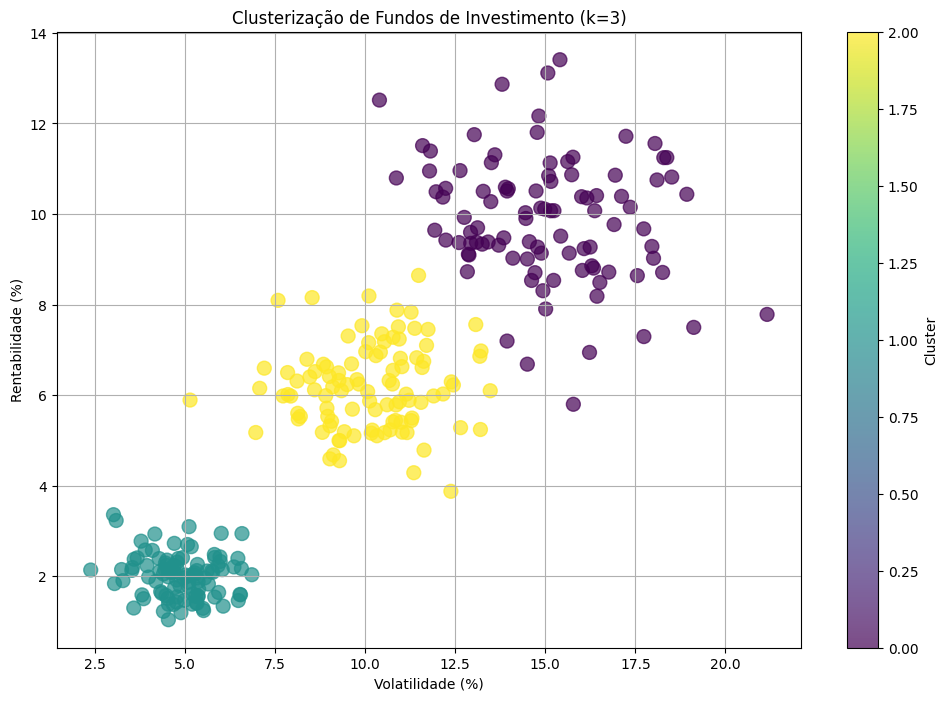

Número ideal de clusters determinado: 3
Centróides dos clusters (dados normalizados:)
[[15.0176591   9.88143818]
 [ 4.89615348  2.01115229]
 [10.11476322  6.16396766]]


In [12]:
volatilidade = np.concatenate([cluster1_vol, cluster2_vol, cluster3_vol])
rentabilidade = np.concatenate([cluster1_ret, cluster2_ret, cluster3_ret])

# Criando DataFrame
dados = pd.DataFrame({
    'Volatilidade': volatilidade,
    'Rentabilidade': rentabilidade,
})

# Normalização dos dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

# Determinando o número ideal de clusters (2-4)
melhor_score = -1
melhor_k = 2

for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(dados_normalizados)
    score = silhouette_score(dados_normalizados, labels)
    
    if score > melhor_score:
        melhor_score = score 
        melhor_k = k 

# Treinando o modelo final com o melhor k
kmeans_final = KMeans(n_clusters=melhor_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(dados_normalizados)

# Plotando os resultados
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    dados['Volatilidade'],
    dados['Rentabilidade'],
    c=labels_final,
    cmap='viridis',
    s=100,
    alpha=0.7
)

plt.title(f'Clusterização de Fundos de Investimento (k={melhor_k})')
plt.xlabel('Volatilidade (%)')
plt.ylabel('Rentabilidade (%)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Exibindo informações sobre os clusters
print(f'Número ideal de clusters determinado: {melhor_k}')
print('Centróides dos clusters (dados normalizados:)')
print(scaler.inverse_transform(kmeans_final.cluster_centers_))